Epoch 1/5


c:\Users\RoG STRIX\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 633ms/step - accuracy: 0.6186 - loss: 0.6512 - val_accuracy: 0.8167 - val_loss: 0.4177
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 662ms/step - accuracy: 0.8579 - loss: 0.3520 - val_accuracy: 0.8704 - val_loss: 0.3169
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 688ms/step - accuracy: 0.9067 - loss: 0.2500 - val_accuracy: 0.8825 - val_loss: 0.2891
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 680ms/step - accuracy: 0.9324 - loss: 0.1912 - val_accuracy: 0.8863 - val_loss: 0.2827
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 45s 713ms/step - accuracy: 0.9490 - loss: 0.1540 - val_accuracy: 0.8845 - val_loss: 0.3157


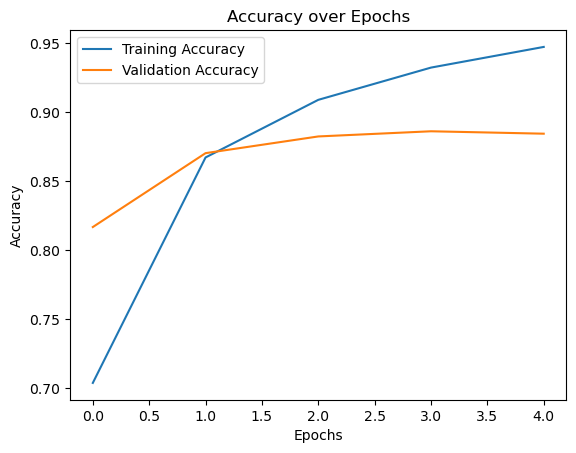

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Prediction score (0 = Negative, 1 = Positive): 0.515
Sentiment: Uncertain 😐


In [2]:
import pandas as pd
import numpy as np
import string
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('imdb_master.csv', encoding='latin-1')
df = df[df['label'].isin(['pos', 'neg'])]  # only binary classification
df['label'] = df['label'].map({'pos': 1, 'neg': 0})

texts = df['review'].astype(str).tolist()
labels = df['label'].values

# Clean text
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

texts = [clean_text(t) for t in texts]

# Tokenization and padding
vocab_size = 10000
max_length = 500

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_length)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# Model with Embedding + LSTM (optional: replace LSTM with Flatten if needed)
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model.add(LSTM(32))  # or use Flatten() instead of LSTM for simplicity
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Review encode function using tokenizer
def encode_review(text):
    cleaned = clean_text(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    return pad_sequences(seq, maxlen=max_length)

# Predicting a user review
user_review = "The movie was not good"
encoded_review = encode_review(user_review)
prediction = model.predict(encoded_review)

score = prediction[0][0]
print("Prediction score (0 = Negative, 1 = Positive):", round(score, 4))
if score >= 0.6:
    print("Sentiment: Positive 🙂")
elif score <= 0.4:
    print("Sentiment: Negative 🙁")
else:
    print("Sentiment: Uncertain 😐")


In [12]:
user_review = "The movie was awful"
encoded_review = encode_review(user_review)
prediction = model.predict(encoded_review)

print("Prediction score (0 = Negative, 1 = Positive):", prediction[0][0])
if prediction[0][0] >= 0.5:
    print("Sentiment: Positive 🙂")
else:
    print("Sentiment: Negative 🙁")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction score (0 = Negative, 1 = Positive): 0.090978414
Sentiment: Negative 🙁


In [4]:
# Evaluate model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int).flatten()

# Print some actual vs predicted values
print("\nSample Predictions:")
for i in range(10):
    actual_label = "Positive 🙂" if y_test[i] == 1 else "Negative 🙁"
    predicted_label = "Positive 🙂" if y_pred[i] == 1 else "Negative 🙁"
    print(f"Review {i+1}: Actual = {actual_label}, Predicted = {predicted_label}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8930 - loss: 0.2941

Test Accuracy: 88.97%
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step

Sample Predictions:
Review 1: Actual = Negative 🙁, Predicted = Negative 🙁
Review 2: Actual = Negative 🙁, Predicted = Negative 🙁
Review 3: Actual = Negative 🙁, Predicted = Negative 🙁
Review 4: Actual = Negative 🙁, Predicted = Negative 🙁
Review 5: Actual = Positive 🙂, Predicted = Positive 🙂
Review 6: Actual = Positive 🙂, Predicted = Positive 🙂
Review 7: Actual = Negative 🙁, Predicted = Negative 🙁
Review 8: Actual = Positive 🙂, Predicted = Positive 🙂
Review 9: Actual = Negative 🙁, Predicted = Negative 🙁
Review 10: Actual = Negative 🙁, Predicted = Negative 🙁


In [5]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.87      0.89      5055
    Positive       0.87      0.91      0.89      4945

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Confusion Matrix:
[[4383  672]
 [ 431 4514]]


In [6]:
# Evaluate model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Predict on test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int).flatten()

# Print comparison for first 20 test samples
print("\nSample Predictions with Correctness:")
for i in range(20):
    actual = int(y_test[i])
    predicted = int(y_pred[i])
    
    actual_label = "Positive 🙂" if actual == 1 else "Negative 🙁"
    predicted_label = "Positive 🙂" if predicted == 1 else "Negative 🙁"
    
    correctness = "Correct ✅" if actual == predicted else "Wrong ❌"
    
    print(f"Review {i+1}: Actual = {actual_label}, Predicted = {predicted_label} --> {correctness}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8930 - loss: 0.2941

Test Accuracy: 88.97%
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step

Sample Predictions with Correctness:
Review 1: Actual = Negative 🙁, Predicted = Negative 🙁 --> Correct ✅
Review 2: Actual = Negative 🙁, Predicted = Negative 🙁 --> Correct ✅
Review 3: Actual = Negative 🙁, Predicted = Negative 🙁 --> Correct ✅
Review 4: Actual = Negative 🙁, Predicted = Negative 🙁 --> Correct ✅
Review 5: Actual = Positive 🙂, Predicted = Positive 🙂 --> Correct ✅
Review 6: Actual = Positive 🙂, Predicted = Positive 🙂 --> Correct ✅
Review 7: Actual = Negative 🙁, Predicted = Negative 🙁 --> Correct ✅
Review 8: Actual = Positive 🙂, Predicted = Positive 🙂 --> Correct ✅
Review 9: Actual = Negative 🙁, Predicted = Negative 🙁 --> Correct ✅
Review 10: Actual = Negative 🙁, Predicted = Negative 🙁 --> Correct ✅
Review 11: Actual = Positive 🙂, Predicted = Positive 🙂 --> Correct ✅
Review 12: Actual = Positive 🙂, Predicted = Positive 🙂 --> Correct ✅
Re

In [7]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,957,349 (7.47 MB)

 Trainable params: 652,449 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,304,900 (4.98 MB)

In [8]:
texts

['once again mr costner has dragged out a movie for far longer than necessary aside from the terrific sea rescue sequences of which there are very few i just did not care about any of the characters most of us have ghosts in the closet and costners character are realized early on and then forgotten until much later by which time i did not care the character we should really care about is a very cocky overconfident ashton kutcher the problem is he comes off as kid who thinks hes better than anyone else around him and shows no signs of a cluttered closet his only obstacle appears to be winning over costner finally when we are well past the half way point of this stinker costner tells us all about kutchers ghosts we are told why kutcher is driven to be the best with no prior inkling or foreshadowing no magic here it was all i could do to keep from turning it off an hour in',
 'this is an example of why the majority of action films are the same generic and boring theres really nothing wort